For x-cut, ne for te mode and to for tm mode

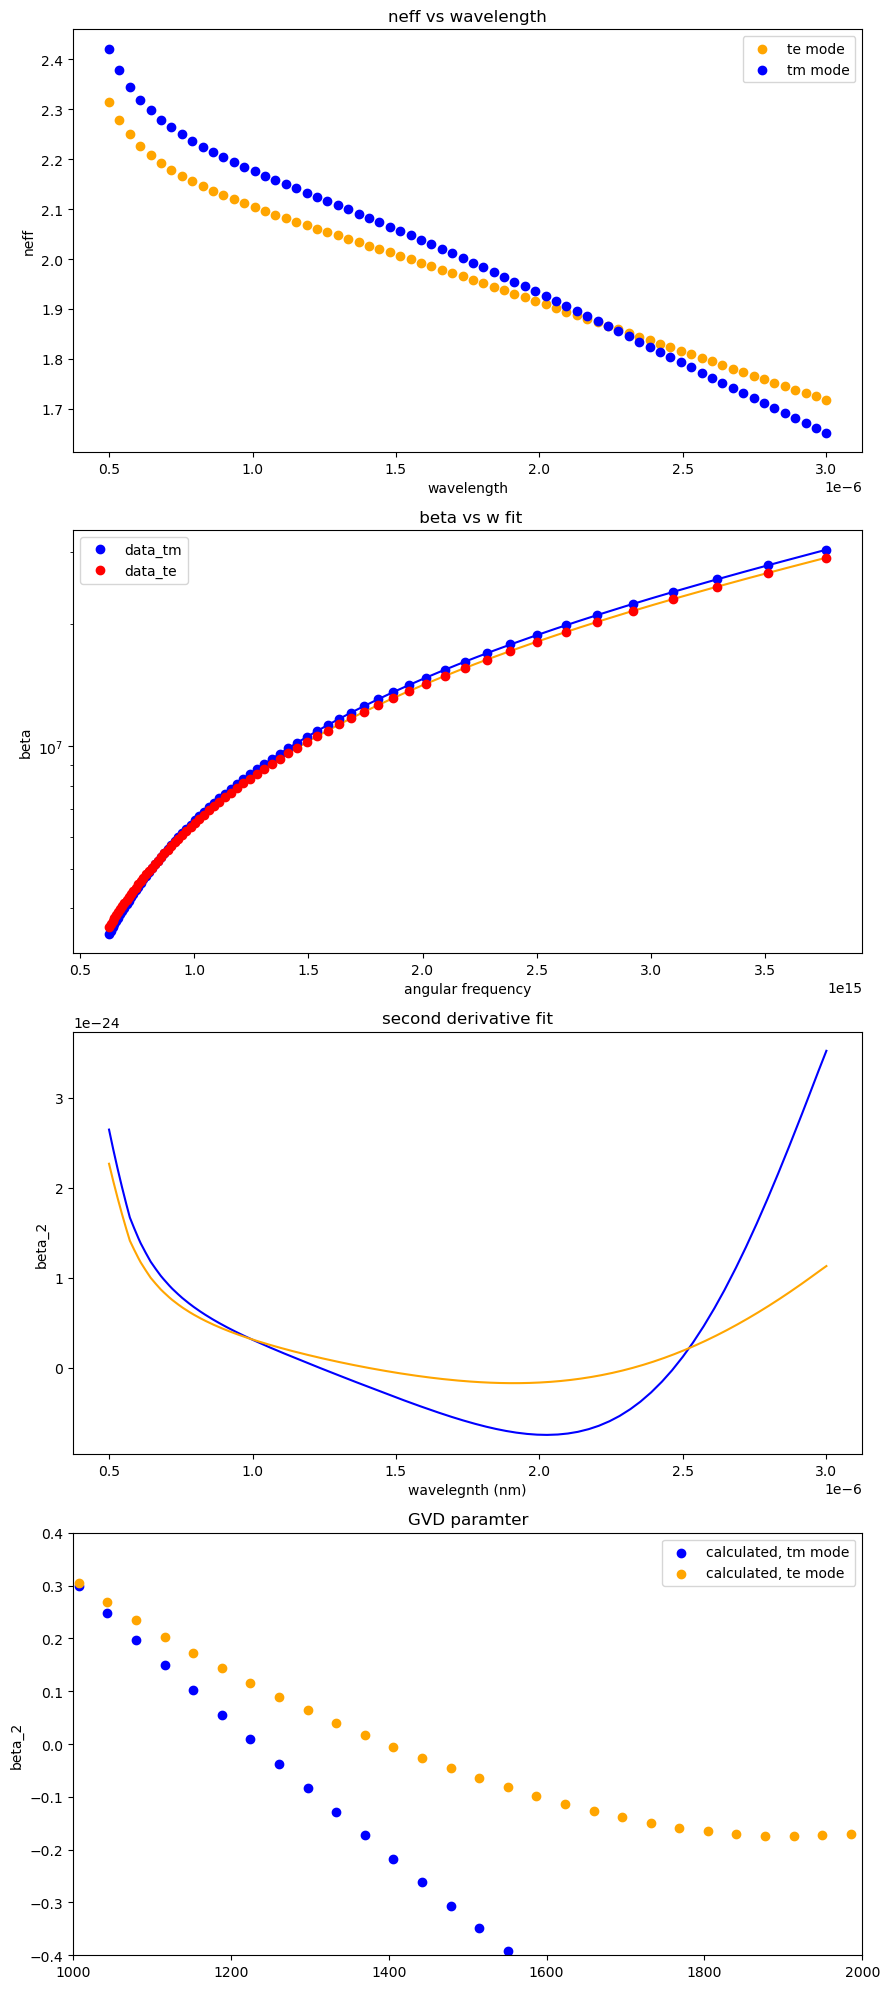

In [7]:

from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
from SCG_Stimulation.Simulation.refractive_index import n_SiO2, n_LNOI, n_Air
from scipy.interpolate import UnivariateSpline
from scipy.constants import speed_of_light as c
import pandas as pd

top_width = 0.8
data_tm = np.load(f"data_h_0.35_w_0.8_no.npz")
data_te = np.load(f"data_h_0.35_w_0.8_ne.npz")
neff_list_tm = np.array(np.real(data_tm['neff_list_tm']))
neff_list_te = np.array(np.real(data_te['neff_list_te']))

wls = np.linspace(500, 3000, 70) * 1e-9
angular_freq = lambda w: (c / w) * 2 * np.pi
beta_tm = neff_list_tm * 2 * np.pi / (wls)
beta_te = neff_list_te * 2 * np.pi / (wls)

sorted_w = angular_freq(wls)[::-1]
sorted_beta_tm = beta_tm[::-1]
sorted_beta_te = beta_te[::-1]

fig, axs = plt.subplots(4, 1, figsize=(9, 20))

#-----------fit neff spline----------------------------------
y_spl_tm = UnivariateSpline(sorted_w, sorted_beta_tm, s=0, k=3)
y_spl_te = UnivariateSpline(sorted_w, sorted_beta_te, s=0, k=3)

w_range = np.linspace(wls[0], wls[-1], 1000)
x_range = angular_freq(w_range)

#-----------neff plot-----------------
axs[0].set_xlabel("wavelength")
axs[0].set_ylabel("neff")
axs[0].set_title("neff vs wavelength")
axs[0].scatter(wls, neff_list_te, color="orange", label="te mode")
axs[0].scatter(wls, neff_list_tm, color="blue", label="tm mode")
axs[0].legend()

#-----------beta plot-----------------
axs[1].set_xlabel("angular frequency")
axs[1].set_ylabel("beta")
axs[1].set_title(" beta vs w fit")
axs[1].semilogy(x_range, y_spl_tm(x_range), color="b")
axs[1].semilogy(x_range, y_spl_te(x_range), color="orange")
axs[1].semilogy(angular_freq(wls), beta_tm, 'bo', label='data_tm')
axs[1].semilogy(angular_freq(wls), beta_te, 'ro', label='data_te')
axs[1].legend()

#-----------beta_2 plot-----------------
y_spl_2d_tm = y_spl_tm.derivative(n=2)
y_spl_2d_te = y_spl_te.derivative(n=2)
axs[2].set_xlabel("wavelegnth (nm)")
axs[2].set_ylabel("beta_2")
axs[2].set_title("second derivative fit")

axs[2].plot(w_range, y_spl_2d_tm(x_range), color="blue")
axs[2].plot(w_range, y_spl_2d_te(x_range), color="orange")

#-----------beta_2 plot---------------------------
beta_2_tm = y_spl_2d_tm(angular_freq(wls)) * 1e24
beta_2_te = y_spl_2d_te(angular_freq(wls)) * 1e24

axs[3].scatter(wls * 1e9, beta_2_tm, label="calculated, tm mode", c="blue")
axs[3].scatter(wls * 1e9, beta_2_te, label="calculated, te mode", c="orange")

axs[3].set_ylabel("beta_2")
axs[3].set_title("GVD paramter")
axs[3].legend()
axs[3].set_xlim(1000, 2000)
axs[3].set_ylim(-0.4, 0.4)
plt.tight_layout()
plt.show()